In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib import rcParams

from scipy.stats import spearmanr
from sklearn.preprocessing import scale 

In [3]:
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

In [4]:
# importando dataset
df = pd.read_csv('datahackers-survey-2019-anonymous-responses.csv')

In [5]:
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


In [6]:
# faixa de salário 
faixa_de_salario = df["('P16', 'salary_range')"]
# idade
idade = df["('P1', 'age')"]
# tipo de trabalho
tipo_de_trabalho = df["('P10', 'job_situation')"]

In [21]:
lista_dados = {
               'idade': idade,
               'sitação de trabalho': tipo_de_trabalho, 
               'salario': faixa_de_salario
              }

df_dados = pd.DataFrame(data = lista_dados)
df_dados.head()

,idade,sitação de trabalho,salario
0,37.0,Empregado (CTL),de R$ 1.001/mês a R$ 2.000/mês
1,24.0,Empregado (CTL),de R$ 2.001/mês a R$ 3000/mês
2,26.0,Empregado (CTL),de R$ 4.001/mês a R$ 6.000/mês
3,21.0,Estagiário,de R$ 1.001/mês a R$ 2.000/mês
4,27.0,Freelancer,de R$ 6.001/mês a R$ 8.000/mês


In [32]:
import re

x = 0
lista_media_de_salario = []
while x < len(faixa_de_salario):
    try:
        salario = faixa_de_salario[x]
        n = [float(s) for s in re.findall(r'-?\d+\.?\d*', salario)]
        n1 = n[0] * 1000
        n2 = n[1] * 1000
        salario_medio = (n1 + n2) / 2
        lista_media_de_salario.append(salario_medio)
    except:
        if pd.isna(faixa_de_salario[x]) == True:
            salario_medio = 0
            lista_media_de_salario.append(salario_medio)
        else:
            salario_medio = 1000
            lista_media_de_salario.append(salario_medio)

    x += 1

new_dataset = {'idade': idade.values, 
               'tipo_de_trabalho': tipo_de_trabalho.values,
               'salario_medio': lista_media_de_salario}

df2 = pd.DataFrame(data=new_dataset)

df2.loc[df2['salario_medio'] == 1501000.5, 'salario_medio'] = 1500.5

In [33]:
# visualizando informações
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             1741 non-null   float64
 1   tipo_de_trabalho  1765 non-null   object 
 2   salario_medio     1765 non-null   float64
dtypes: float64(2), object(1)
memory usage: 41.5+ KB


In [34]:
# somando valores nulos
df2.isnull().sum()

idade               24
tipo_de_trabalho     0
salario_medio        0
dtype: int64

In [35]:
# removendo valores nulos
df2.dropna(inplace=True)
df2.isnull().sum()

idade               0
tipo_de_trabalho    0
salario_medio       0
dtype: int64

In [36]:
# convertendo idade para inteiro
df2['idade'] = df2['idade'].astype('int64')
df2.dtypes

idade                 int64
tipo_de_trabalho     object
salario_medio       float64
dtype: object

In [37]:
df2.head()

,idade,tipo_de_trabalho,salario_medio
0,37,Empregado (CTL),1500.5
1,24,Empregado (CTL),1500.5
2,26,Empregado (CTL),5000.5
3,21,Estagiário,1500.5
4,27,Freelancer,7000.5


In [38]:
# maior salário
df2['salario_medio'].max()

22500.5

(array([119., 280., 338., 312., 235., 226.,  98.,  59.,  39.,  35.]),
 array([18. , 21.2, 24.4, 27.6, 30.8, 34. , 37.2, 40.4, 43.6, 46.8, 50. ]),
 <BarContainer object of 10 artists>)

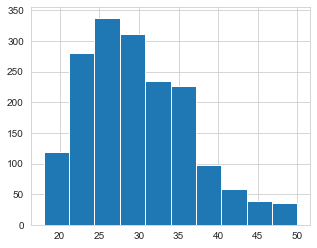

In [39]:
plt.hist(df2['idade'])

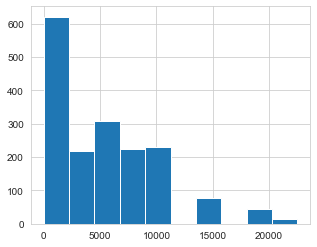

In [40]:
plt.hist(df2['salario_medio'])
plt.show()

In [41]:
df2['tipo_de_trabalho'].value_counts()

Empregado (CTL)                                  1066
Empreendedor ou Empregado (CNPJ)                  224
Estagiário                                        131
Somente Estudante (graduação)                      85
Desempregado, buscando recolocação                 66
Servidor Público                                   58
Trabalho na área Acadêmica/Pesquisador             45
Somente Estudante (pós-graduação)                  36
Freelancer                                         21
Prefiro não dizer                                   6
Desempregado e não estou buscando recolocação       3
Name: tipo_de_trabalho, dtype: int64

In [21]:
df2.shape

(1741, 3)

In [42]:
x = ['idade']
y = ['salario_medio']

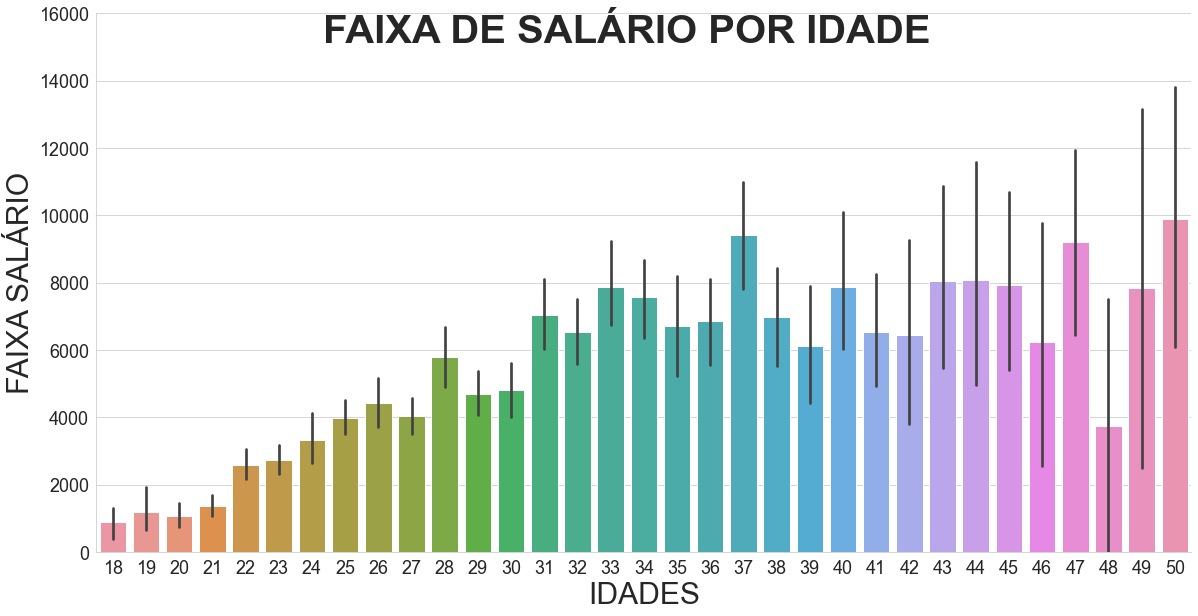

In [43]:
# Criando gráfico.
ax = sns.catplot(data = df2, 
            x = df2["idade"], 
            y = df2["salario_medio"], 
            kind = "bar",
            height = 8,
            aspect = 2,
            legend = False)

# Adicionando os detalhes fundamentais.

ax.set_axis_labels(x_var = "IDADES", y_var = "FAIXA SALÁRIO", fontsize = 30)
ax.set_xticklabels(fontsize= 18)
ax.set_yticklabels(fontsize= 18)
ax.fig.suptitle("FAIXA DE SALÁRIO POR IDADE", fontsize = 40, weight = "bold")
plt.show()
ax.savefig('faixa_salario_por_idade.png')